Q05:


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack
def calc_envoltoria(Ns,tau,x_AM): #funcao para determinar o valor da envoltoria (parametros: numero de pontos,valor da constante de tempo e sinal de entrada (já retificado))
    fx_env=np.zeros(len(x_AM))
    out=-1
    for i in range(Ns):
        inp = x_AM[i]
        if inp>=out:
            out = inp            # Caso 1: x_am(t) > Vc(t) (carga do capacitor)
        else:
            out *= (1-Ts/tau)    # Caso 2: x_am(t) < Vc(t) (descarga do capacitor)
        fx_env[i] = out
    return fx_env

    
tau = 1e-4                                                      # Constante de tempo do detector de envelope
tau1= 2e-4
tau2=4e-3
Ts=1e-6                                                         # Definição do período
t = np.arange(1000)*Ts                                          # Definição do vetor tempo
fc = 10000                                                      # Frequência da portadora.
fm = 1500                                                       # Frequência do sinal
Mu = 0.6                                                        # Índice de modulaçao.
Ac = 1.0
x_AMo = Ac*(1.0+Mu*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t);  # Onda Modulada AM-DSB

x_envIdeal = np.abs(Ac*(1.0+Mu*np.cos(2*np.pi*fm*t)))           # Envoltória ideal

# Detector de envoltória
x_AM = x_AMo*(x_AMo>0)                                          # Efeito do diodo (semiciclo positivo)
x_env = np.zeros(len(x_AM))
Ns = len(x_AM)
x_env=calc_envoltoria(Ns,tau,x_AM)                             #X_AM já retificada 
x_env1=calc_envoltoria(Ns,tau1,x_AM)
x_env2=calc_envoltoria(Ns,tau2,x_AM)
#Calculo do erro medio quadrático:
mse = ((x_envIdeal - x_env)**2).mean(axis=None)
ms1 = ((x_envIdeal - x_env1)**2).mean(axis=None)
ms2 = ((x_envIdeal - x_env2)**2).mean(axis=None)
print("mse para tau = 1e-4: ", mse)
print("mse para tau = 2e-4: ", ms1)
print("mse para tau = 1e-3: ", ms2)

Q03:

In [1]:
%EbN0_dB = 5;
EbN0 = 5;
Pe = qfunc(sqrt(2*EbN0));
disp(['Pe = ' num2str(Pe,'%1.2e')]);
disp([' Um erro a cada = ' num2str(1/Pe,'%1.2e')]);

Pe = 7.83e-04
 Um erro a cada = 1.28e+03


Q04:

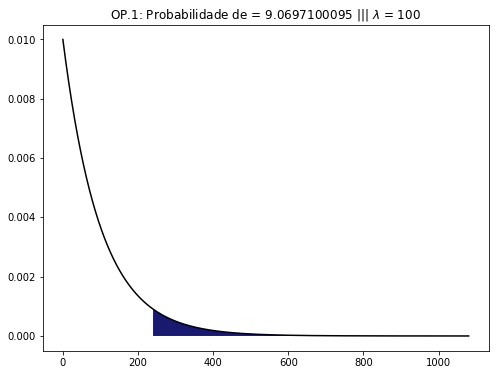

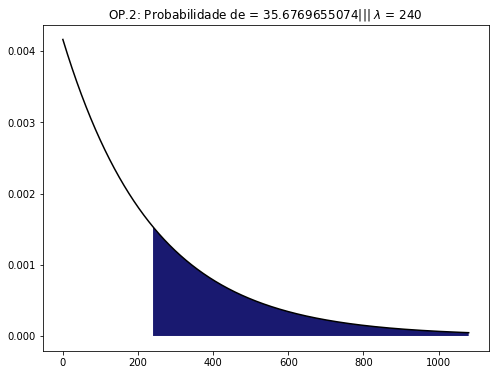

OP.1::::
Probabilidade pela área da PDF = 9.0697100095 %
Probabilidade pela formula da PDF =  9.0718 %
OP.2:::::
Probabilidade pela área da PDF = 35.6769655074 %
Probabilidade pela formula da PDF =  3.67879441e+1 %


In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
# Distribuição
T=0.001                                      # Taxa de amostragem
my_lambda1=100
my_lambda2=240
Tf=18*60
x=np.arange(0,Tf+T,T)                        # Eixo x       
ExpNorm1=stats.expon.pdf(x,scale=my_lambda1)
ExpNorm2=stats.expon.pdf(x,scale=my_lambda2)
# Cálculo da probabilidade
limite_esquerdo = np.round(4*60/T)
limite_direito = np.round(Tf/T)
indices = np.arange(limite_esquerdo+1,limite_direito,dtype=np.int64)
prob1=np.sum(ExpNorm1[indices])*T*100        # Probabilidade de um evento ocorrer no intervalo
prob1_1=np.sum(ExpNorm2[indices])*T*100        # Probabilidade de um evento ocorrer no intervalo
plt.figure(1,[8,6])
plt.plot(x,ExpNorm1,'k')                                       
plt.title('OP.1: Probabilidade de = ' + str(prob1) + ' ||| $\lambda$ = ' + str(my_lambda1) )      # Mostra valor verdadeiro de prob1
plt.fill_between(x[indices],ExpNorm1[indices],facecolor='midnightblue')
plt.figure(2,[8,6])
plt.plot(x,ExpNorm2,'k')                                       
plt.title('OP.2: Probabilidade de = ' + str(prob1_1)+'||| $\lambda$ = ' + str(my_lambda2) )      # Mostra valor verdadeiro de prob1
plt.fill_between(x[indices],ExpNorm2[indices],facecolor='midnightblue')
plt.show()
# calculando diretamente da integral
from sympy import *
init_printing(use_unicode=False, wrap_line=False, no_global=True)
x, f1,f2 = symbols('x f1 f2')
expoente1=-my_lambda1*x
expoente2=-my_lambda2*x
f1 = 1/my_lambda1*exp(-1/my_lambda1*x)
f2 = 1/my_lambda2*exp(-1/my_lambda2*x)
prob2 = N(integrate(f1, (x,4*60,np.Inf)))
prob2_1 = N(integrate(f2, (x,4*60,np.Inf)))
print("OP.1::::")
print("Probabilidade pela área da PDF = "+str(prob1)+" %")
print("Probabilidade pela formula da PDF =  {:02.4f} %" .format(prob2*100))
print("OP.2:::::")
print("Probabilidade pela área da PDF = "+str(prob1_1)+" %")
print("Probabilidade pela formula da PDF =  {:02.8e} %" .format(prob2_1*100))

Q02:

M = 8;                                                 % Número de símbolo da modulação
Ns = 10e3;                                           % Número de símbolos simulados
bits8 = randi([0 M-1],Ns,1);
txSig = pskmod(bits8,M);
pTx = sum(abs(txSig.^2))/Ns;
disp 'oi'
figure(2)
EbN0_dB = [10];
for m=1:length(EbN0_dB)
    rxSig = awgn(txSig,EbN0_dB(m));
    n=rxSig-txSig; % ruído
    
    potN2 = sum(abs(n.^2))/Ns; 
    disp(['Potencia do Ruido = ' num2str(potN2)])
    disp(['Potencia do Ruido [dB] = ' num2str(10*log10(potN2*10^-3))])
    
    print()
    if(m==2)
        buffer_8psk=rxSig;
     end
    figure
    plot(rxSig(find(angle(rxSig)*180/pi>=-45/2 & angle(rxSig)*180/pi<=45/2)),'o');
    hold all;
    plot(rxSig(find(angle(rxSig)*180/pi>45/2 & angle(rxSig)*180/pi<=3/2*45)),'o');
    plot(rxSig(find(angle(rxSig)*180/pi>3/2*45 & angle(rxSig)*180/pi<=5/2*45)),'o');
    plot(rxSig(find(angle(rxSig)*180/pi>5/2*45 & angle(rxSig)*180/pi<=7/2*45)),'o');
    plot(rxSig(find(angle(rxSig)*180/pi>7/2*45 & angle(rxSig)*180/pi<=11/2*45)),'ro');
    plot(rxSig(find(angle(rxSig)*180/pi<-45/2 & angle(rxSig)*180/pi>=-3/2*45)),'o');
    plot(rxSig(find(angle(rxSig)*180/pi<-3/2*45 & angle(rxSig)*180/pi>=-5/2*45)),'o');
    plot(rxSig(find(angle(rxSig)*180/pi<-5/2*45 & angle(rxSig)*180/pi>=-7/2*45)),'o');
    plot(rxSig(find(angle(rxSig)*180/pi<-7/2*45 & angle(rxSig)*180/pi>=-11/2*45)),'ro');
    title(['Diagrama de constelaçao: Eb/N0 = ' num2str(EbN0_dB(m)) 'dB']);
    title(['Diagrama de constelaçao: Eb/N0 = ' num2str(EbN0_dB(m)) 'dB']);
   % legend('000','001','011','010','100','101','111','110');
    
    minAx = min([real(rxSig)' imag(rxSig)']);
    maxAx = max([real(rxSig)' imag(rxSig)']);
    %axis([minAx maxAx minAx maxAx]);
    %ylim([-5 5])
    axis equal
   % fig.PaperUnits = 'inches';
    %fig.PaperPosition = [0 128 128 48];

    
end

Q01:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fs=8000                                              # Frequência de amostragem
Ts=1/fs                                              # Período de amostragem
fm=20                                                # Frequência da onda
Tm=1/fm                                              # Período de amostragem
t= np.arange(0,Tm,Ts)                                # Eixo do tempo
m_t=np.sin(2*np.pi*fm*t)                             # Sinal m(t)
N=len(m_t)
L= [4, 8,16,128];                                 # Níveis de quantização
sig_max=max(m_t)                                     # Encontra pico máximo
sig_min=min(m_t)                                     # Encontra pico mínimo
plt.figure(1,[10,15])
Pm_t =(np.linalg.norm(m_t)**2)/N # Cálculo da potência no tempo
# Quantização com round() para cada nível de quantização especificado
for il in range(0,len(L)):
    Li = L[il]
    Delta=(sig_max-sig_min)/Li                       # Intervalo de quantização (distância entre um nível e outro)
    q_level=np.arange(sig_min+Delta/2,sig_max,Delta) # Vetor com as amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)

    sigp=m_t-sig_min                                 # Deixa o sinal somente com amplitudes positivas (shift para cima)
    # Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp=sigp*(1/Delta)                                
    sigp=sigp + 1/2 +0.0001                          # Tira elementos do zero 
    # Agora que nenhum valor do sinal  é zero nem negativo:
    qindex=np.round(sigp)                            # Encontra inteiro mais proximo para cada elemento
    qindex[qindex>Li] = Li                           # Trunca o excedente de qindex 
    qindex = qindex.astype(int)                      # Casting para inteiro (garantindo que é do tipo inteiro)
    q_out=q_level[abs(qindex-1)]                     # Distribui nos níveis cada elemento 
    P_e =(np.linalg.norm(m_t-q_out)**2)/N # Cálculo da potência no tempo
    sqnr = Pm_t/P_e
    sqnr_db = 10*np.log10(sqnr)
        
    var=4
    plt.subplot('{}1{}'.format(len(L),il+1))
    plt.plot(t,m_t,t,q_out,t,(m_t-q_out))
    plt.title('Quantização L = {} níveis / SQNR = {:.2f}dB'.format(Li,sqnr_db))
    plt.legend(["Original", "Quantizado", "Erro de Quantização"])

plt.show()